In [14]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
seed = 1
df = pd.read_csv('../week2/housing.csv')
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
df.fillna(0, inplace=True)
df['median_house_value_log'] = np.log1p(df['median_house_value'])

In [16]:
from sklearn.model_selection import train_test_split

df_train_val, df_test = train_test_split(df, random_state=seed, test_size=0.2)
df_train, df_val = train_test_split(df_train_val, random_state=seed, test_size=0.25)

y_train = df_train['median_house_value_log']
y_val = df_val['median_house_value_log']
y_test = df_test['median_house_value_log']

del df_train['median_house_value_log']
del df_val['median_house_value_log']
del df_test['median_house_value_log']
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [17]:
from sklearn.feature_extraction import DictVectorizer


def get_vectorizer(df: pd.DataFrame):
    copy = df.copy()
    copy = copy.to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    dv.fit(copy)
    return dv


def get_input(df: pd.DataFrame, dv: DictVectorizer):
    copy = df.copy()
    copy = copy.to_dict(orient='records')
    return dv.transform(copy)

# Question 1

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import abc


class ModelInterface:
    @abc.abstractmethod
    def fit(self, x, y):
        pass

    @abc.abstractmethod
    def predict(self, x):
        pass


class InputPreparator(object):
    def __init__(self, df: pd.DataFrame):
        self.dv = get_vectorizer(df)

    def get_input(self, df: pd.DataFrame):
        return get_input(df, self.dv)

    def get_feature_names(self):
        return self.dv.feature_names_


class DecisionTreeRegressorModel(DecisionTreeRegressor, ModelInterface):
    pass


class RandomForestRegressorModel(RandomForestRegressor, ModelInterface):
    pass

In [19]:
def train_procedure(model: ModelInterface, df, y) -> (ModelInterface, InputPreparator):
    input_prep = InputPreparator(df)
    x = input_prep.get_input(df)
    model.fit(x, y)
    return model, input_prep

In [20]:
from sklearn.tree import export_text

model = DecisionTreeRegressorModel(max_depth=1)
model, input_prep = train_procedure(model, df_train, y_train)
tree_text = export_text(model, feature_names=input_prep.get_feature_names())
print(tree_text)

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]


In [21]:
print('q1: ocean_proximity')

q1: ocean_proximity


# Question 2

In [22]:
from sklearn.metrics import mean_squared_error

model = RandomForestRegressorModel(n_estimators=10, random_state=seed, n_jobs=-1)
model, input_prep = train_procedure(model, df_train, y_train)
x_val = input_prep.get_input(df_val)
y_pred = model.predict(x_val)
print('q2: ', mean_squared_error(y_val, y_pred))

q2:  0.05999847525676806


# Question 3

number of estimators: 10 	 RMSE: 0.06
number of estimators: 20 	 RMSE: 0.0571
number of estimators: 30 	 RMSE: 0.0561
number of estimators: 40 	 RMSE: 0.0552
number of estimators: 50 	 RMSE: 0.055
number of estimators: 60 	 RMSE: 0.0548
number of estimators: 70 	 RMSE: 0.0548
number of estimators: 80 	 RMSE: 0.0549
number of estimators: 90 	 RMSE: 0.0549
number of estimators: 100 	 RMSE: 0.0548
number of estimators: 110 	 RMSE: 0.0548
number of estimators: 120 	 RMSE: 0.0547
number of estimators: 130 	 RMSE: 0.0546
number of estimators: 140 	 RMSE: 0.0545
number of estimators: 150 	 RMSE: 0.0545
number of estimators: 160 	 RMSE: 0.0544
number of estimators: 170 	 RMSE: 0.0544
number of estimators: 180 	 RMSE: 0.0545
number of estimators: 190 	 RMSE: 0.0546
number of estimators: 200 	 RMSE: 0.0545


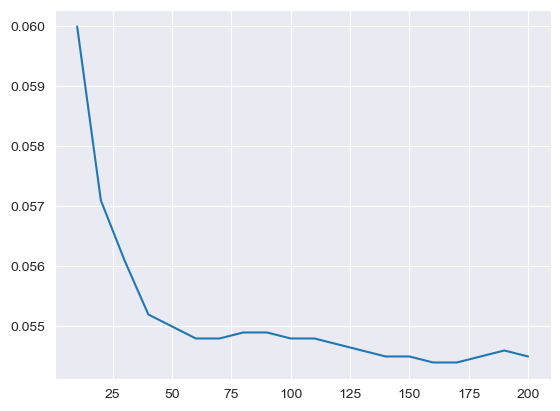

In [37]:
xs, ys = [], []
for n_estimators in range(10, 210, 10):
    model = RandomForestRegressorModel(n_estimators=n_estimators, random_state=seed, n_jobs=-1)
    model, input_prep = train_procedure(model, df_train, y_train)
    x_val = input_prep.get_input(df_val)
    y_pred = model.predict(x_val)
    rmse = round(mean_squared_error(y_val, y_pred), 4)

    print(f'number of estimators: {n_estimators} \t RMSE: {rmse}')
    xs.append(n_estimators)
    ys.append(rmse)

plt.plot(xs, ys)

In [38]:
print('q3: 160')

q3: 160


## Question 4

maximum depth: 10 	 number of estimators: 10 	 RMSE: 0.063
maximum depth: 10 	 number of estimators: 20 	 RMSE: 0.0613
maximum depth: 10 	 number of estimators: 30 	 RMSE: 0.0607
maximum depth: 10 	 number of estimators: 40 	 RMSE: 0.0601
maximum depth: 10 	 number of estimators: 50 	 RMSE: 0.0603
maximum depth: 10 	 number of estimators: 60 	 RMSE: 0.0602
maximum depth: 10 	 number of estimators: 70 	 RMSE: 0.0602
maximum depth: 10 	 number of estimators: 80 	 RMSE: 0.0604
maximum depth: 10 	 number of estimators: 90 	 RMSE: 0.0603
maximum depth: 10 	 number of estimators: 100 	 RMSE: 0.0603
maximum depth: 10 	 number of estimators: 110 	 RMSE: 0.0602
maximum depth: 10 	 number of estimators: 120 	 RMSE: 0.0601
maximum depth: 10 	 number of estimators: 130 	 RMSE: 0.06
maximum depth: 10 	 number of estimators: 140 	 RMSE: 0.0599
maximum depth: 10 	 number of estimators: 150 	 RMSE: 0.0599
maximum depth: 10 	 number of estimators: 160 	 RMSE: 0.0598
maximum depth: 10 	 number of estima

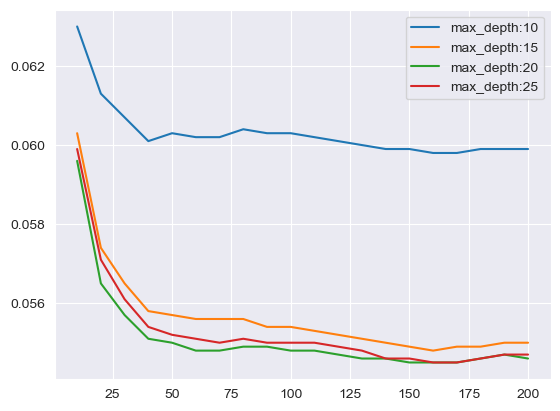

In [36]:
for max_depth in [10, 15, 20, 25]:
    xs, ys = [], []
    for n_estimators in range(10, 210, 10):
        model = RandomForestRegressorModel(
            n_estimators=n_estimators, random_state=seed, max_depth=max_depth, n_jobs=-1)
        model, input_prep = train_procedure(model, df_train, y_train)
        x_val = input_prep.get_input(df_val)
        y_pred = model.predict(x_val)
        rmse = round(mean_squared_error(y_val, y_pred), 4)

        print(f'maximum depth: {max_depth} \t number of estimators: {n_estimators} \t RMSE: {rmse}')
        xs.append(n_estimators)
        ys.append(rmse)

    plt.plot(xs, ys, label=f'max_depth:{max_depth}')
plt.legend()

In [39]:
print('q4: 20')

q4: 20


## Question 5

In [52]:
model = RandomForestRegressorModel(n_estimators=10, max_depth=20, random_state=seed, n_jobs=-1)
model, input_prep = train_procedure(model, df_train, y_train)
pd.DataFrame(index=input_prep.get_feature_names(), data=model.feature_importances_)

,0
households,0.015527
housing_median_age,0.030003
latitude,0.101855
longitude,0.086367
median_income,0.335563
ocean_proximity=<1H OCEAN,0.292473
ocean_proximity=INLAND,0.073806
population,0.027353
total_bedrooms,0.015328
total_rooms,0.021723


In [53]:
print('q5: median_income')

q5: median_income


## Question 6

In [89]:
import xgboost as xgb

dv = get_vectorizer(df_train)

x_train = get_input(df_train, dv)
x_val = get_input(df_val, dv)

feature_names = list(map(lambda x: x.replace('<', 'less_that'), dv.feature_names_))
d_train = xgb.DMatrix(x_train, label=y_train, feature_names=feature_names)
d_val = xgb.DMatrix(x_val, label=y_val, feature_names=feature_names)

In [90]:
watchlist = [(d_train, 'train'), (d_val, 'validation')]
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(
    xgb_params,
    d_train,
    num_boost_round= 100,
    evals=watchlist,
    verbose_eval=10
)

[0]	train-rmse:8.07362	validation-rmse:8.07348
[10]	train-rmse:0.33195	validation-rmse:0.34802
[20]	train-rmse:0.20036	validation-rmse:0.24508
[30]	train-rmse:0.18204	validation-rmse:0.23833
[40]	train-rmse:0.16422	validation-rmse:0.23379
[50]	train-rmse:0.15210	validation-rmse:0.23262
[60]	train-rmse:0.14218	validation-rmse:0.23160
[70]	train-rmse:0.13471	validation-rmse:0.23108
[80]	train-rmse:0.12835	validation-rmse:0.23045
[90]	train-rmse:0.12174	validation-rmse:0.22957
[99]	train-rmse:0.11656	validation-rmse:0.22897


In [91]:
# todo

[(<xgboost.core.DMatrix at 0x14cd05630>, 'train'),
 (<xgboost.core.DMatrix at 0x14ccff6a0>, 'validation')]